# **Import libs**

In [48]:
import sys
import string
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np

spotify_path = '../code/Spotify'
sys.path.append(spotify_path)

from Spotify import Spotify as sp

In [76]:
df_clean[df_clean['name'] == 'LUDMILLA']

,external_urls,followers,genres,id,name,popularity,uri,related_artists_ids
7528,https://open.spotify.com/artist/3CDoRporvSjdzT...,7496995,"funk carioca, funk pop, funk rj, pagode baiano...",3CDoRporvSjdzTrm99a3gi,LUDMILLA,77,spotify:artist:3CDoRporvSjdzTrm99a3gi,"3zgnrYIltMkgeejmvMCnes, 7rXMvXRnWHaSwnVvPeUUfw..."


In [71]:
sp.artists_related_to('7FNnA9vBm6EKceENgCGRMb')

KeyboardInterrupt: 

In [69]:
df_clean.iloc[55]['genres']

'funk pop, funk rj, pagode baiano, pop, pop nacional'

In [91]:
sp.search(q='Niall Horan', type='artist', limit=5, offset=0)

{'artists': {'href': 'https://api.spotify.com/v1/search?query=Niall+Horan&type=artist&offset=0&limit=5',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/1Hsdzj7Dlq2I7tHP7501T4'},
    'followers': {'href': None, 'total': 9917154},
    'genres': ['pop'],
    'href': 'https://api.spotify.com/v1/artists/1Hsdzj7Dlq2I7tHP7501T4',
    'id': '1Hsdzj7Dlq2I7tHP7501T4',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab6761610000e5ebeccc1cde8e9fdcf1c9289897',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/ab67616100005174eccc1cde8e9fdcf1c9289897',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/ab6761610000f178eccc1cde8e9fdcf1c9289897',
      'width': 160}],
    'name': 'Niall Horan',
    'popularity': 75,
    'type': 'artist',
    'uri': 'spotify:artist:1Hsdzj7Dlq2I7tHP7501T4'},
   {'external_urls': {'spotify': 'https://open.spotify.com/artist/5ZsFI1h6hIdQRw2ti0hz81'},
    'followers'

# **Realizando a busca dos artistas**

In [ ]:
artists = []

for letter in string.ascii_letters:
  for offset in tqdm(range(0, 1000, 50), desc=f'Letra {letter}'):
    results = sp.search(q=letter, type='artist', limit=50, offset=offset)
    artists += results['artists']['items']

# **Criando uma rede com as informações obtidas e tratando/retirando algumas colunas**

In [ ]:
df = pd.DataFrame(artists)
df['external_urls'] = df['external_urls'].map(lambda x: x['spotify'])
df['followers'] = df['followers'].map(lambda x: x['total'])
df['genres'] = df['genres'].map(lambda x: ', '.join(x))
df.drop(columns=['href', 'images', 'type'], inplace=True)
display(df)

# **Retirando os artistas que aparecem mais de uma vez no dataset**

In [ ]:
df_clean = df.drop_duplicates()
df_clean.reset_index(inplace=True, drop='index')
df_clean

# **Retirando os artistas sem gênero**

In [ ]:
df_clean.loc[:, 'genres'] = df['genres'].replace('', np.nan)
df_clean = df_clean.dropna(subset=['genres'])
df_clean.reset_index(drop=True, inplace=True)
df_clean

# **Retirando artistas que estão em único gênero sozinhos**

In [4]:
genres = {}
for index in range(len(df_clean)):
    genres_line = df_clean['genres'][index]
    genres_line = genres_line.split(', ')
    for genre in genres_line:
        if genre not in genres:
            genres[genre] = 0
        genres[genre] += 1

In [5]:
genres_to_delete = []
for genre, quantity in genres.items():
    if quantity == 1:
        genres_to_delete.append(genre)
genres_to_delete

['el paso indie',
 'early avant garde',
 'west end',
 'polish classical',
 'cologne indie',
 'german singer-songwriter',
 'dreampunk',
 'pinoy alternative rap',
 'bhajan',
 'chicago hardcore',
 'nueva ola chilena',
 'medieval',
 'deep rai',
 'math rock',
 'melbourne punk',
 'tampa indie',
 'rap feminino chileno',
 'norwegian classical',
 'channel pop',
 'rock keyboard',
 'ukrainian electronic',
 'louisiana metal',
 'reggae gaucho',
 'rock of gibraltar',
 'caucasian classical',
 'swiss house',
 'canadian classical',
 'rai',
 'syrian hip hop',
 'lata',
 'sudanese hip hop',
 'latin tek',
 'trap catala',
 'minimal tech house',
 'canadian modern jazz',
 'acoustic cover',
 'experimental vocal',
 'icelandic singer-songwriter',
 'paisley underground',
 'danish metal',
 'danish rock',
 'omaha indie',
 'puerto rican indie',
 'finnish heavy metal',
 'popgaze',
 'bass music',
 'canadian house',
 'swedish heavy metal',
 'phoenix indie',
 'london indie',
 'norsk lovsang',
 'bajki',
 'cascadia shoega

In [6]:
for index in range(len(df_clean)):
    genres_line = df_clean['genres'][index]
    genres_line = genres_line.split(', ')
    list_aux = []
    for genre in genres_line:
        if genre not in genres_to_delete:
            list_aux.append(genre)
    if len(genres_line) != len(list_aux):
        if len(list_aux) > 0: 
            new_value = ', '.join(list_aux)
        else: 
            new_value = np.nan
        df_clean.loc[index, 'genres'] = new_value
df_clean = df_clean.dropna(subset=['genres'])
df_clean.reset_index(inplace=True, drop='index')
df_clean

,external_urls,followers,genres,id,name,popularity,uri
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH
...,...,...,...,...,...,...,...
14783,https://open.spotify.com/artist/7EyzyrMNgqiK8b...,1417807,rap mineiro,7EyzyrMNgqiK8bMrbkOT9l,Sidoka,59,spotify:artist:7EyzyrMNgqiK8bMrbkOT9l
14784,https://open.spotify.com/artist/6gzXCdfYfFe5XK...,2313438,"k-pop, k-pop boy group",6gzXCdfYfFe5XKhPKkYqxV,SUPER JUNIOR,58,spotify:artist:6gzXCdfYfFe5XKhPKkYqxV
14785,https://open.spotify.com/artist/7AAXcP4NpvvLM9...,609413,"sertanejo, sertanejo universitario",7AAXcP4NpvvLM9Xcfy64ij,Hugo Pena & Gabriel,40,spotify:artist:7AAXcP4NpvvLM9Xcfy64ij
14786,https://open.spotify.com/artist/5KvkOKroKLz202...,186296,"folk metal, german metal, melodic death metal,...",5KvkOKroKLz202ioXfGWR2,Equilibrium,49,spotify:artist:5KvkOKroKLz202ioXfGWR2


# **Analisando o df**

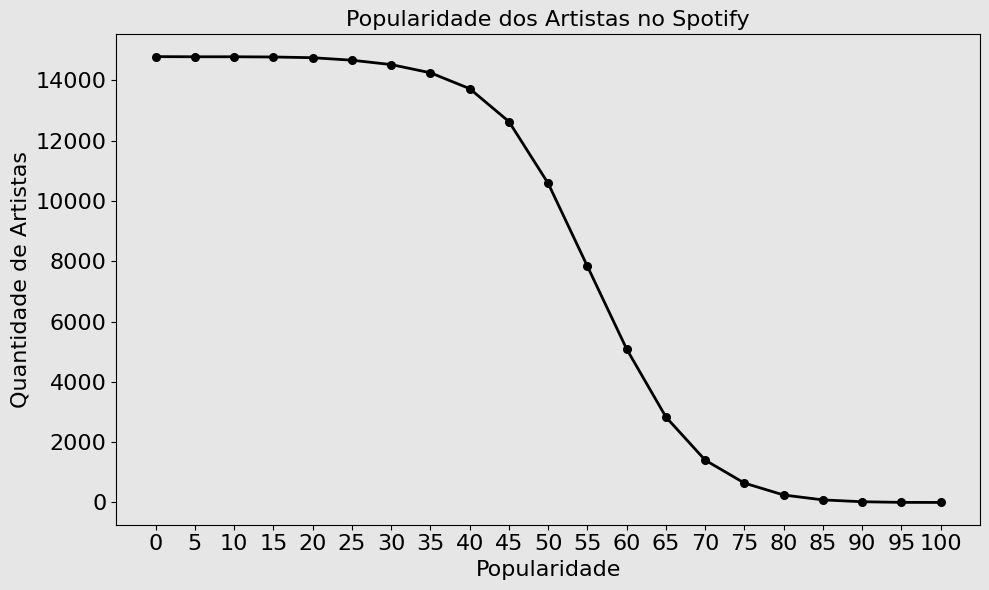

In [44]:
x_values = list(range(0, 105, 5))
quantity_of_artists = [len(df_clean[df_clean['popularity'] >= value]) for value in x_values]
fig, ax = plt.subplots(figsize=(10, 6))

fig.patch.set_facecolor('#E6E6E6')
ax.set_facecolor('#E6E6E6')

ax.plot(x_values, quantity_of_artists, marker='o', color='black', markersize=5.5, linewidth=2)

ax.set_xticks(x_values)
ax.set_title('Popularidade dos Artistas no Spotify', fontsize=16)
ax.set_xlabel('Popularidade', fontsize=16)
ax.set_ylabel('Quantidade de Artistas', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()
fig.savefig('fig.png', dpi=300, bbox_inches='tight')

In [54]:
genres = {}
for index in range(len(df_clean)):
    genres_line = df_clean['genres'][index]
    genres_line = genres_line.split(', ')
    for genre in genres_line:
        if genre not in genres:
            genres[genre] = 0
        genres[genre] += 1
sorted_genres = dict(sorted(genres.items(), key=lambda item: item[1], reverse=True))

In [55]:
len(genres)

2392

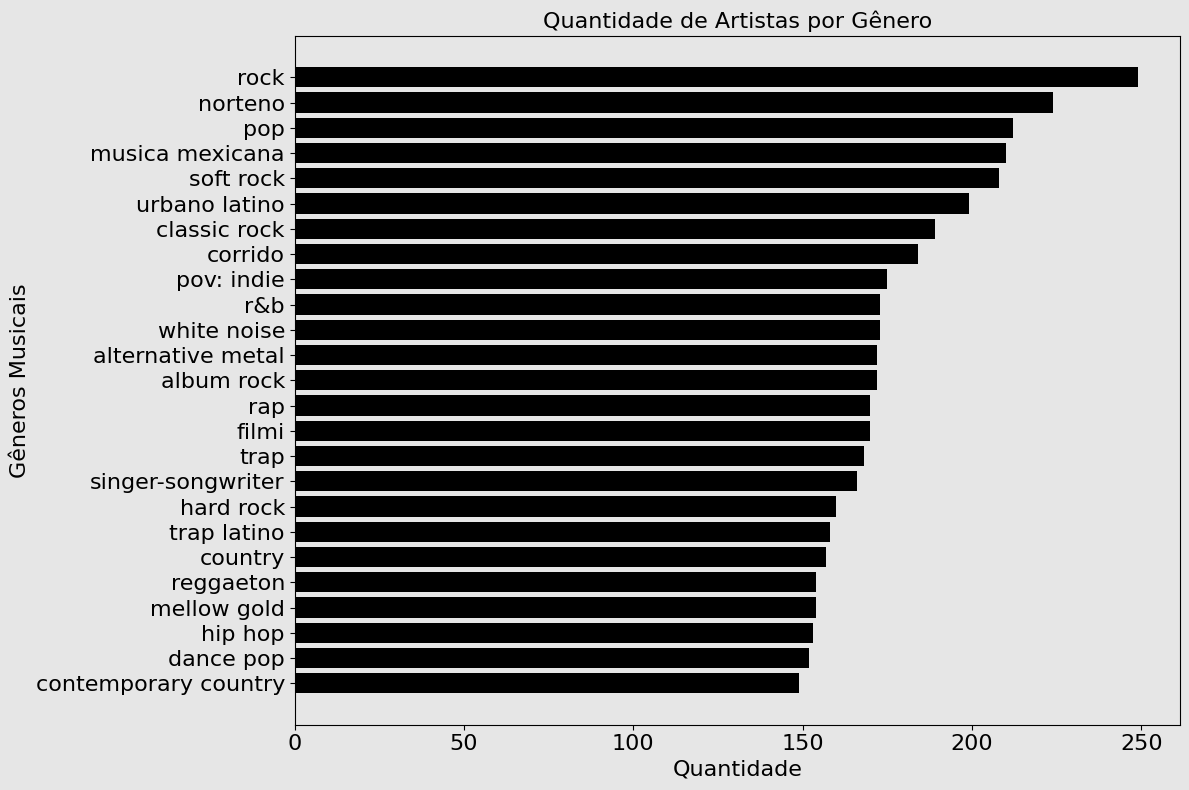

In [39]:
sorted_genres = dict(list(sorted_genres.items())[:25])

genres = list(sorted_genres.keys())
genres = genres[::-1]
values = list(sorted_genres.values())
values = values[::-1]

fig, ax = plt.subplots(figsize=(12, 8))
fig.patch.set_facecolor('#E6E6E6')
ax.set_facecolor('#E6E6E6')

ax.barh(genres, values, color='black')

ax.set_xlabel('Quantidade', fontsize=16)
ax.set_ylabel('Gêneros Musicais', fontsize=16)
ax.set_title('Quantidade de Artistas por Gênero', fontsize=16)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.tight_layout()
plt.show()
#fig.savefig('fig.png', dpi=300, bbox_inches='tight')

In [47]:
df_clean[df_clean['name'] == 'Marília Mendonça']

,external_urls,followers,genres,id,name,popularity,uri,related_artists_ids
8131,https://open.spotify.com/artist/1yR65psqiazQpe...,34244830,"arrocha, sertanejo, sertanejo universitario",1yR65psqiazQpeM79CcGh8,Marília Mendonça,80,spotify:artist:1yR65psqiazQpeM79CcGh8,"59jlthNnbmim5l9tmNA7se, 0jD7VeE1m2SdHbOWeCtB9l..."


# **Encontrando os artistas relacionados aos artistas do df**

In [ ]:
with open('artist_related_artists.csv', 'a+') as file:
    file.seek(0)
    content = file.readlines()
    for i in tqdm(range(len(content), len(df_clean))):
        artist_related_artists = sp.artists_related_to(df_clean['id'][i])
        artist_related_artists_str = ', '.join([artist['id'] for artist in artist_related_artists['artists']])
        file.write(f"{df_clean['id'][i]}\t{(artist_related_artists_str)}")
        file.write('\n')

# **Adicionadno os adicionados relacionados no df**

In [6]:
df_related_artists = pd.read_csv('artist_related_artists.csv', header=None, names=['artist_id', 'related_artists_ids'], sep='\t')
df_related_artists

,artist_id,related_artists_ids
0,4dpARuHxo51G3z768sgnrY,"5WUlDfRSoLAfcVSX1WnrxN, 2wY79sveU1sp5g7SokKOiI..."
1,66CXWjxzNUsdJxJ2JdwvnR,"4nDoRrQiYLoBzwC5BhVJzF, 0C8ZW7ezQVs4URX5aX7Kqx..."
2,13ubrt8QOOCPljQ2FL1Kca,"5dHt1vcEm9qb8fCyLcB3HL, 2P5sC9cVZDToPxyomzF1UH..."
3,06HL4z0CvFAxyc27GXpf02,"0C8ZW7ezQVs4URX5aX7Kqx, 1McMsnEElThX1knmY4oliG..."
4,7Ln80lUS6He07XvHI8qqHH,"77SW9BnxLY8rJ0RciFqkHh, 0epOFNiUfyON9EYx7Tpr6V..."
...,...,...
14783,7EyzyrMNgqiK8bMrbkOT9l,"0OLpdla9YvZOtlPnQkXScl, 5K854sjdzabwOy9KltU3Po..."
14784,6gzXCdfYfFe5XKhPKkYqxV,"3EfnKIG9827OXkcQQT7HEI, 5Kdp1Iq26eCz7XbPxOgt7F..."
14785,7AAXcP4NpvvLM9Xcfy64ij,"77PXntcAH6TrnvUuXE3cU9, 0WP4PLxwWMBq3WWc01TBgJ..."
14786,5KvkOKroKLz202ioXfGWR2,"0krXCIkthz13P8o0v2tksH, 4ZgkHVHmGPXuRy8zd26ZJX..."


In [18]:
artist_related_artists_list = []
for index in range(len(df_related_artists)):
    if type(df_related_artists['related_artists_ids'][index]) == float: 
        artist_related_artists_list.append(np.nan)
        continue
    related_artists_ids = df_related_artists['related_artists_ids'][index].split(', ')
    list_aux = []
    for artist_id in related_artists_ids:
        if artist_id in list(df_clean['id']):
            list_aux.append(artist_id)
    new_value = ', '.join(list_aux)
    artist_related_artists_list.append(new_value)

df_clean.loc[:, 'related_artists_ids'] = artist_related_artists_list
df_clean

# **Salvando o df**

In [20]:
df_clean.to_csv('spotify_artists.csv', index=False)

In [2]:
df_clean = pd.read_csv('spotify_artists.csv')
df_clean

,external_urls,followers,genres,id,name,popularity,uri,related_artists_ids
0,https://open.spotify.com/artist/4dpARuHxo51G3z...,57657211,"british soul, pop, pop soul, uk pop",4dpARuHxo51G3z768sgnrY,Adele,86,spotify:artist:4dpARuHxo51G3z768sgnrY,"5WUlDfRSoLAfcVSX1WnrxN, 2wY79sveU1sp5g7SokKOiI..."
1,https://open.spotify.com/artist/66CXWjxzNUsdJx...,98814719,pop,66CXWjxzNUsdJxJ2JdwvnR,Ariana Grande,91,spotify:artist:66CXWjxzNUsdJxJ2JdwvnR,"4nDoRrQiYLoBzwC5BhVJzF, 0C8ZW7ezQVs4URX5aX7Kqx..."
2,https://open.spotify.com/artist/13ubrt8QOOCPlj...,14722549,"east coast hip hop, hip hop, rap",13ubrt8QOOCPljQ2FL1Kca,A$AP Rocky,84,spotify:artist:13ubrt8QOOCPljQ2FL1Kca,"5dHt1vcEm9qb8fCyLcB3HL, 2P5sC9cVZDToPxyomzF1UH..."
3,https://open.spotify.com/artist/06HL4z0CvFAxyc...,118971229,pop,06HL4z0CvFAxyc27GXpf02,Taylor Swift,100,spotify:artist:06HL4z0CvFAxyc27GXpf02,"0C8ZW7ezQVs4URX5aX7Kqx, 1McMsnEElThX1knmY4oliG..."
4,https://open.spotify.com/artist/7Ln80lUS6He07X...,25991892,"garage rock, modern rock, permanent wave, rock...",7Ln80lUS6He07XvHI8qqHH,Arctic Monkeys,85,spotify:artist:7Ln80lUS6He07XvHI8qqHH,"77SW9BnxLY8rJ0RciFqkHh, 0epOFNiUfyON9EYx7Tpr6V..."
...,...,...,...,...,...,...,...,...
14783,https://open.spotify.com/artist/7EyzyrMNgqiK8b...,1417807,rap mineiro,7EyzyrMNgqiK8bMrbkOT9l,Sidoka,59,spotify:artist:7EyzyrMNgqiK8bMrbkOT9l,"4oPnjkJcLqOim9KJxvIYMz, 1QBWA6tuiZ0JuDluPqbe71..."
14784,https://open.spotify.com/artist/6gzXCdfYfFe5XK...,2313438,"k-pop, k-pop boy group",6gzXCdfYfFe5XKhPKkYqxV,SUPER JUNIOR,58,spotify:artist:6gzXCdfYfFe5XKhPKkYqxV,"6nVMMEywS5Y4tsHPKx1nIo, 1bkpTEmumLC3xc7HgMsttU..."
14785,https://open.spotify.com/artist/7AAXcP4NpvvLM9...,609413,"sertanejo, sertanejo universitario",7AAXcP4NpvvLM9Xcfy64ij,Hugo Pena & Gabriel,40,spotify:artist:7AAXcP4NpvvLM9Xcfy64ij,"5Dyg6H3QJHQV5c7ojyKWyv, 4ZUahcHoVxr4lsrfdmhjhV..."
14786,https://open.spotify.com/artist/5KvkOKroKLz202...,186296,"folk metal, german metal, melodic death metal,...",5KvkOKroKLz202ioXfGWR2,Equilibrium,49,spotify:artist:5KvkOKroKLz202ioXfGWR2,3t5X2CVDf5mrlIx1SdvWYM


In [14]:
with open('artist_collaborations.csv', 'a+') as file:
    file.seek(0)
    content = file.readlines()
    for i in tqdm(range(len(content), len(df_clean))):
        collaborations_list = sp.get_collaborations(df_clean['id'][i])
        if len(collaborations_list) != []:
            collaborations_list_str = ', '.join(collaborations_list)
        else:
            collaborations_list_str = ''
        file.write(f"{df_clean['id'][i]}\t{(collaborations_list_str)}")
        file.write('\n')

  0%|          | 20/14779 [09:33<151:30:07, 36.95s/it]

In [ ]:
df_artist_collaborations = pd.read_csv('artist_collaborations.csv', header=None, names=['artist_id', 'artist_collaborations'], sep='\t')
df_artist_collaborations